# **Price Prediction - Multiple Linear Regression**
Multiple Linear Regression - Cleanin, Correlation,Dummies,Multicollinearity,OLS

About Dataset
The car company wants to enter a new market and needs an estimation of exactly which variables affect the car prices.
The goal is:

* Which variables are significant in predicting the price of a car
* How well do those variables describe the price of a car

kaggle link: https://www.kaggle.com/datasets/erolmasimov/price-prediction-multiple-linear-regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#memanggil data

import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regression/scrap price.csv")
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# **1. Cleaning Data**

**Checking Data Duplikat dan Missing Value**

In [ ]:
#checking data duplikat
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [ ]:
data.duplicated().sum()

0

Dikarenakan tidak ada data duplikat sehingga dapat dilanjutkan untuk checking missing value dari dataset yang digunakan.

In [ ]:
#checking missing value dataset
data.isna().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Pada dataset yang digunakan tidak terdapat missing value sehingga dapat dilanjutkan ke tahap identifying outlier.

**Seleksi Variabel dan Merapikan Data**

Namun, sebelum itu, akan dibuang variabel ID terlebih dahulu karena dirasa kurang begitu penting untuk dimasukkan ke dalam pemodelan.

In [4]:
data_pakai=data.drop('ID',axis=1)
data_pakai

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Terlebih dahulu akan dilakukan checking terhadap nama mobil untuk memastikan apakah ada atau tidak spelling atau penulisan yang harus dibenarkan dalam variabel name.

In [5]:
#checking data unique di variabel name
data_pakai.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
#merapikan data pada variabel name
data_pakai['name'] = data_pakai['name'].apply(lambda x : x.split(' ')[0])
data_pakai

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
#checking ulang data dalam variabel name
data_pakai.name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Berdasarkan output tersebut dapat dilihat bahwa masih terdapat beberapa nama mobil yang salah ataupun berbeda dalam penulisannya sehingga harus dibenarkan. Nama-nama tersebut adalah:
* 'maxda': 'mazda'
* 'nissan': 'Nissan'
* 'porcshce': 'porsche'
* 'toyouta': 'toyota'
* 'vokswagen': 'volkswagen'
* 'vw': 'volkswagen'

In [8]:
#mengubah atau merapikan beberapa nama mobil
data_pakai['name'] = data_pakai['name'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
data_pakai.name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Langkah selanjutnya adalah checking outlier. Pada tahapan ini akan dilakukan checking outlier menggunakan boxplot. Lalu, jika terindikasi outliers akan ditangani menggunakan Interquartile Range (IQR).

**Identifying Outlier**

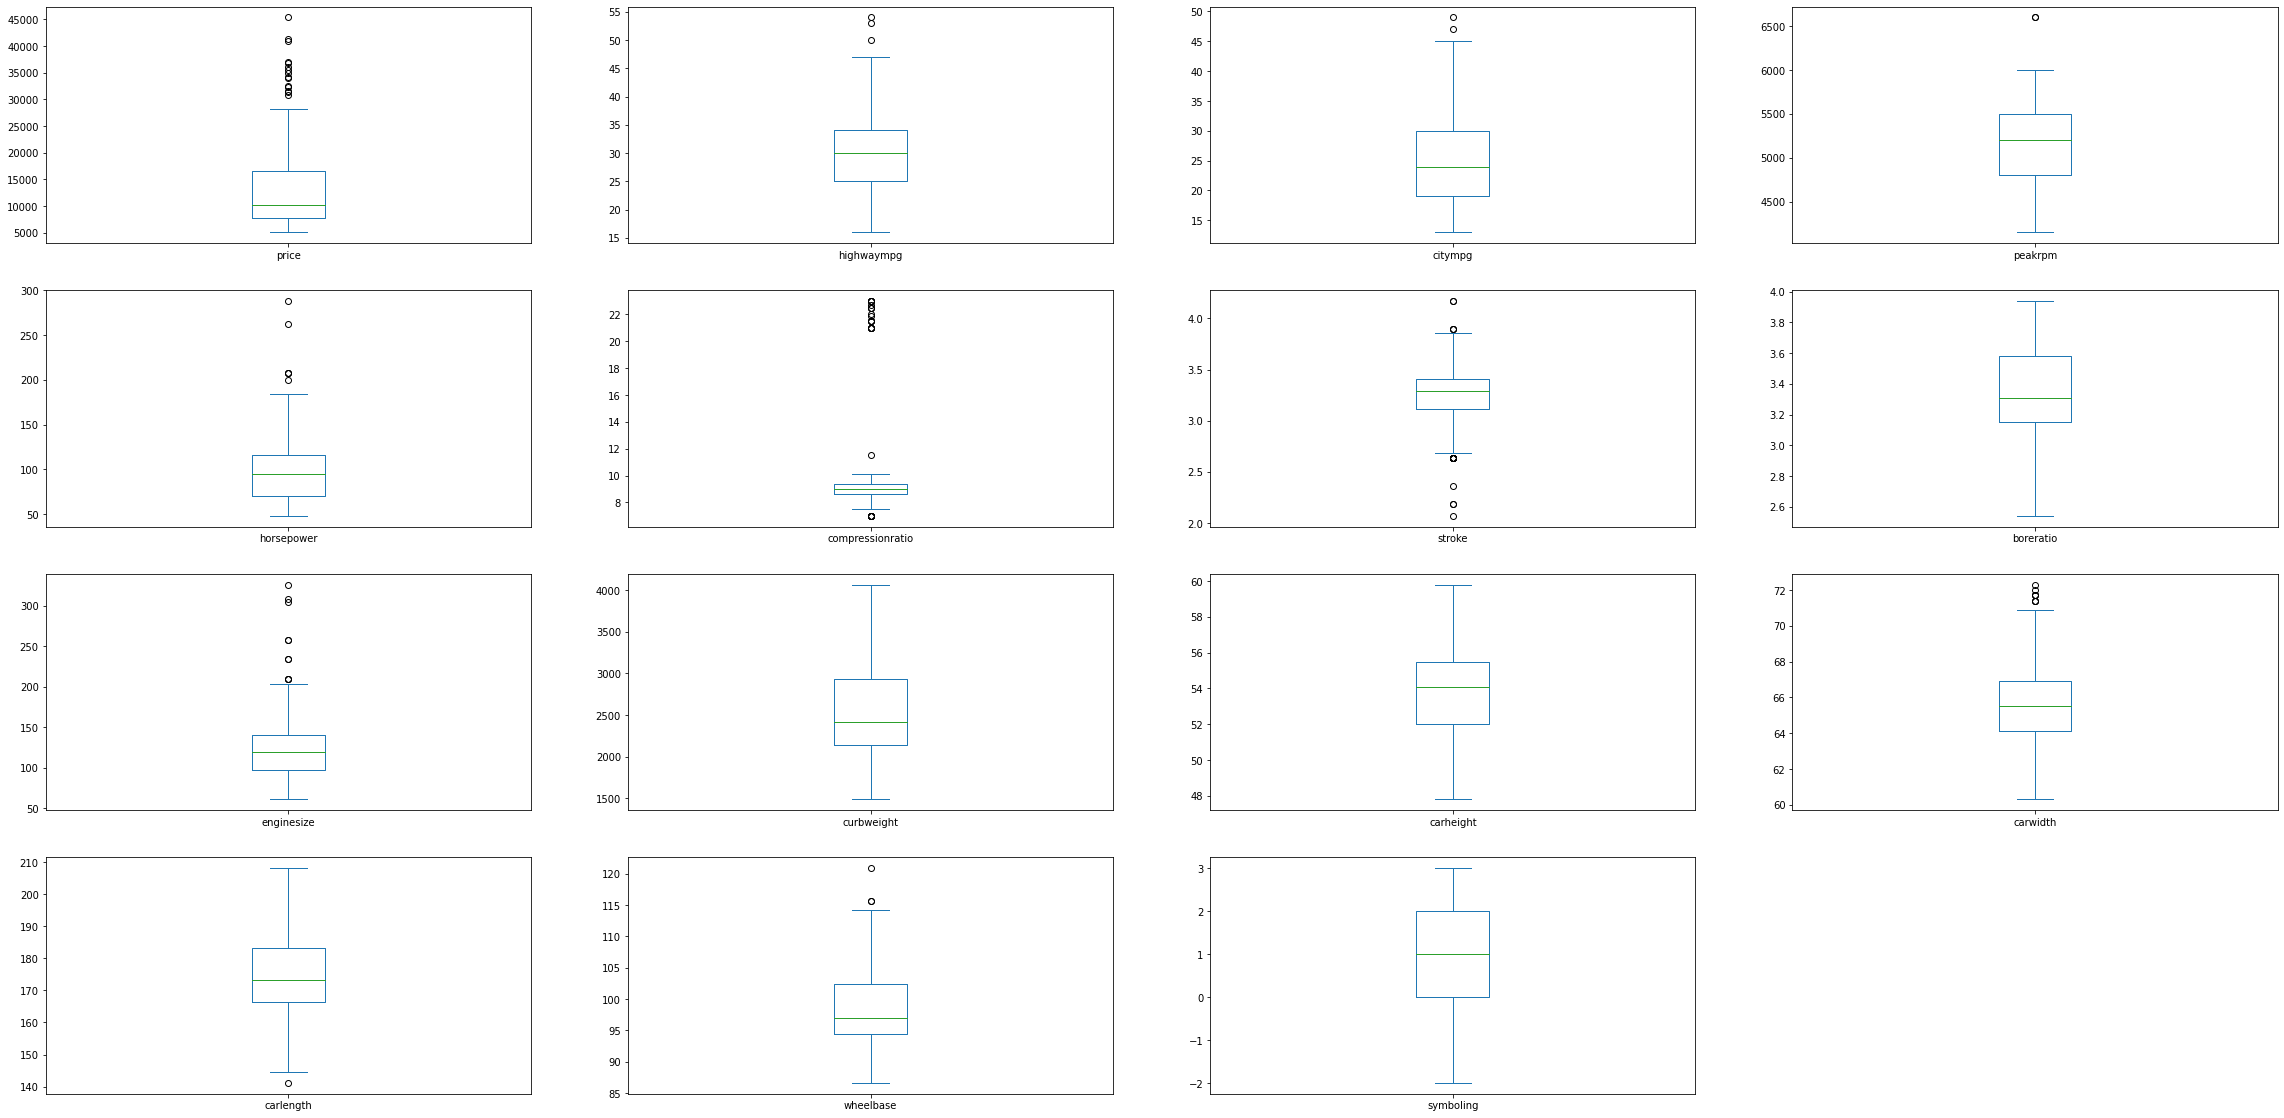

In [9]:
#cheking outlier

import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))

plt.subplot(4,4,1)
data_pakai.price.plot(kind='box')

plt.subplot(4,4,2)
data_pakai.highwaympg.plot(kind='box')

plt.subplot(4,4,3)
data_pakai.citympg.plot(kind='box')

plt.subplot(4,4,4)
data_pakai.peakrpm.plot(kind='box')

plt.subplot(4,4,5)
data_pakai.horsepower.plot(kind='box')

plt.subplot(4,4,6)
data_pakai.compressionratio.plot(kind='box')

plt.subplot(4,4,7)
data_pakai.stroke.plot(kind='box')

plt.subplot(4,4,8)
data_pakai.boreratio.plot(kind='box')

plt.subplot(4,4,9)
data_pakai.enginesize.plot(kind='box')

plt.subplot(4,4,10)
data_pakai.curbweight.plot(kind='box')

plt.subplot(4,4,11)
data_pakai.carheight.plot(kind='box')

plt.subplot(4,4,12)
data_pakai.carwidth.plot(kind='box')

plt.subplot(4,4,13)
data_pakai.carlength.plot(kind='box')

plt.subplot(4,4,14)
data_pakai.wheelbase.plot(kind='box')

plt.subplot(4,4,15)
data_pakai.symboling.plot(kind='box')

plt.show()


Berdasarkan output bosplot di atas dapat dilihat bahwa masih terdapat outlier di hampir setiap variabel. Hal tersebut dapat mengakibatkan mengakibatkan asumsi normalitas tidak terpenuhi sehingga model menjadi unbias.

In [10]:
#menghapus seluruh outlier yang ada
#menggunakan Interquartile Range (IQR)

Q1=data_pakai.quantile(0.25)
Q3=data_pakai.quantile(0.75)
IQR=Q3-Q1

up=Q3+1.5*IQR
low=Q1-1.5*IQR

data_bersih=(data_pakai[~((data_pakai>up) | (data_pakai<low)).any(axis=1)])
data_bersih


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()


,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


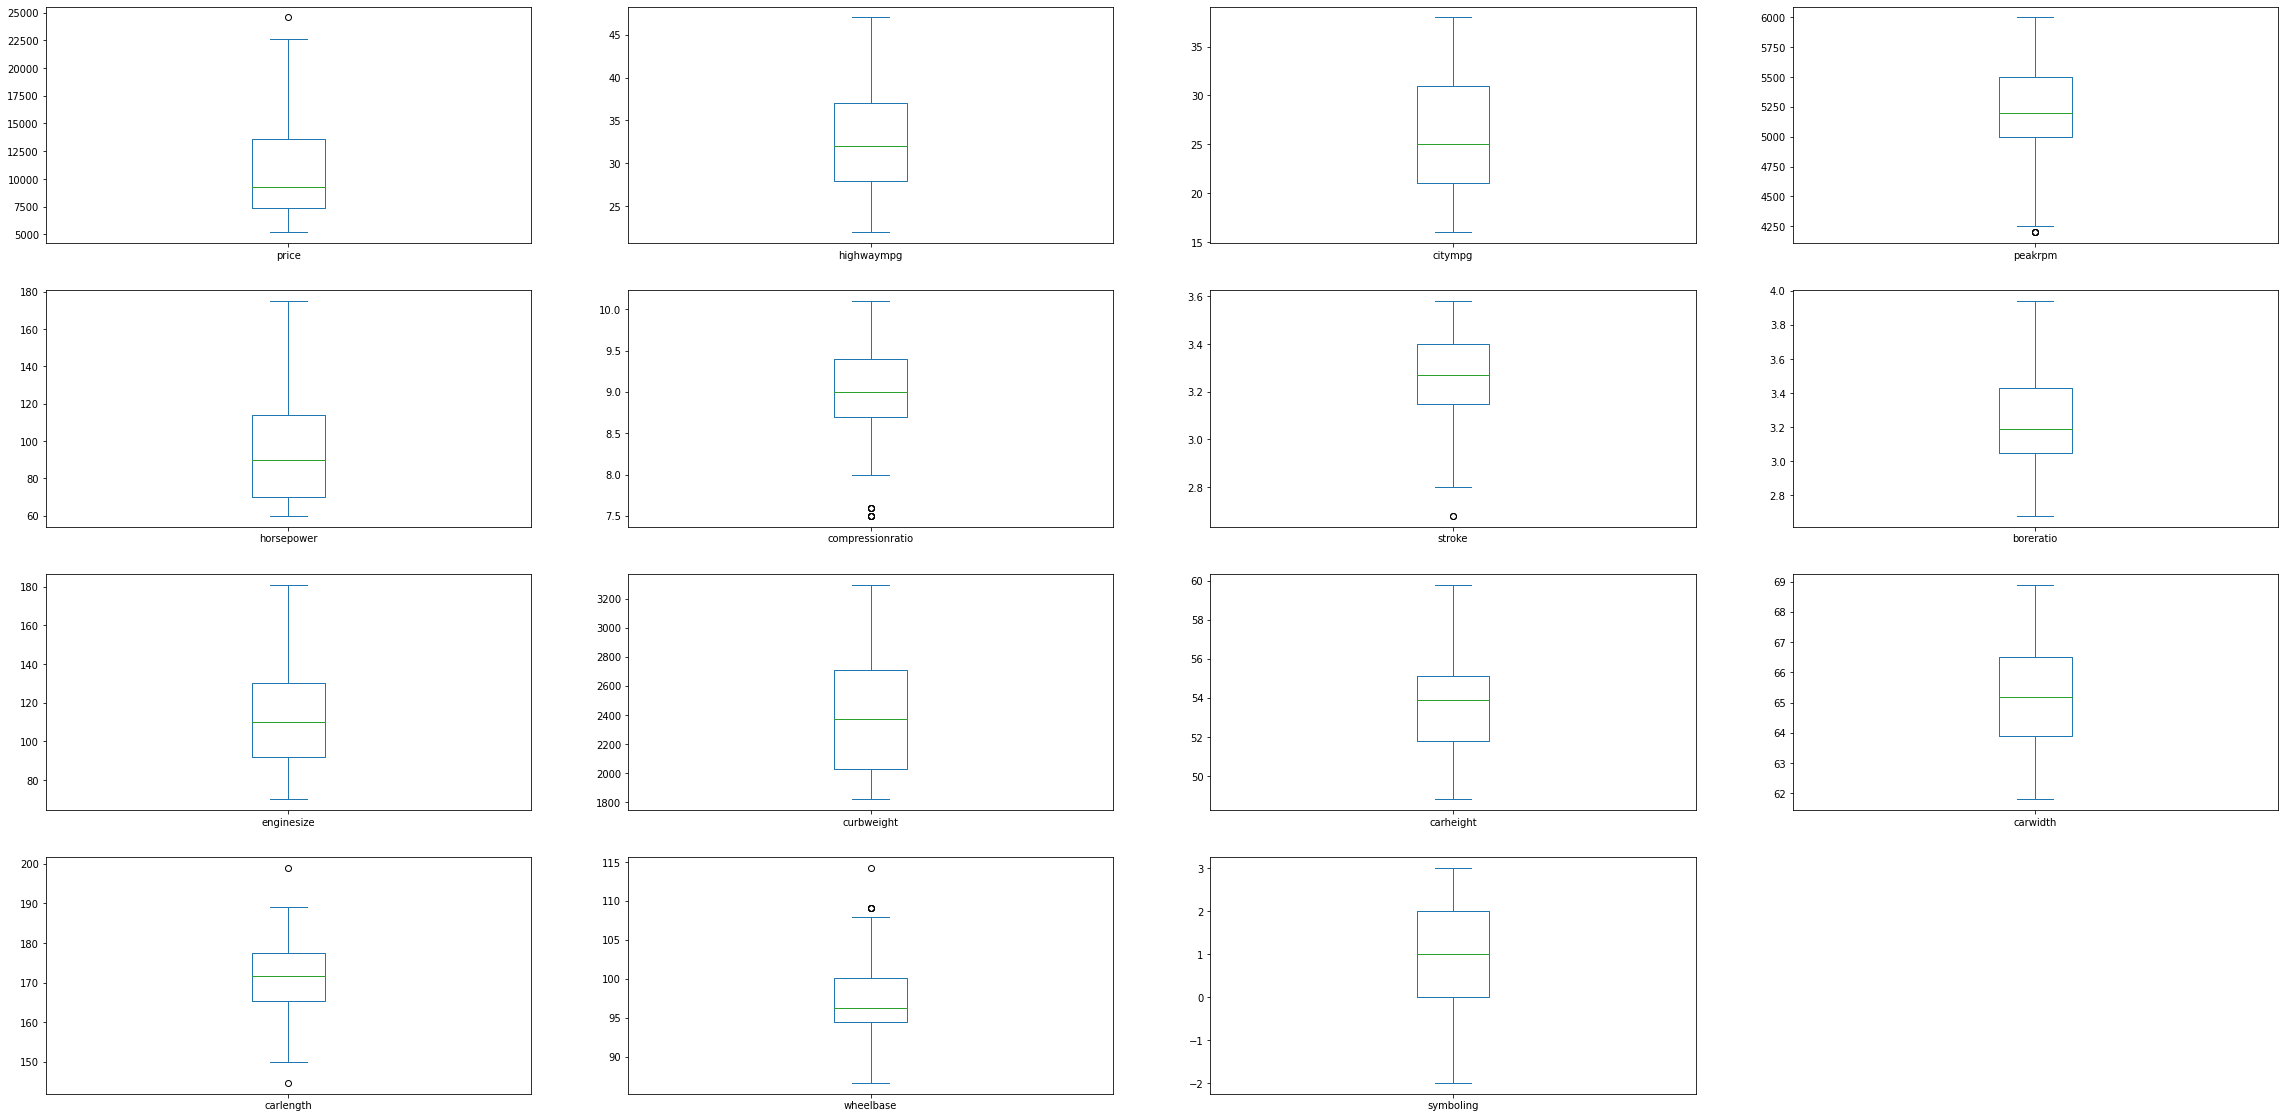

In [11]:
#melakukan rechecking terhadap outlier

plt.figure(figsize=(40,20))

plt.subplot(4,4,1)
data_bersih.price.plot(kind='box')

plt.subplot(4,4,2)
data_bersih.highwaympg.plot(kind='box')

plt.subplot(4,4,3)
data_bersih.citympg.plot(kind='box')

plt.subplot(4,4,4)
data_bersih.peakrpm.plot(kind='box')

plt.subplot(4,4,5)
data_bersih.horsepower.plot(kind='box')

plt.subplot(4,4,6)
data_bersih.compressionratio.plot(kind='box')

plt.subplot(4,4,7)
data_bersih.stroke.plot(kind='box')

plt.subplot(4,4,8)
data_bersih.boreratio.plot(kind='box')

plt.subplot(4,4,9)
data_bersih.enginesize.plot(kind='box')

plt.subplot(4,4,10)
data_bersih.curbweight.plot(kind='box')

plt.subplot(4,4,11)
data_bersih.carheight.plot(kind='box')

plt.subplot(4,4,12)
data_bersih.carwidth.plot(kind='box')

plt.subplot(4,4,13)
data_bersih.carlength.plot(kind='box')

plt.subplot(4,4,14)
data_bersih.wheelbase.plot(kind='box')

plt.subplot(4,4,15)
data_bersih.symboling.plot(kind='box')

plt.show()

Berdasarkan boxplot di atas dapat dilihat bahwa masih terdapat outlier pada beberapa variabel, namun jumlahnya sudah berkurang dibandingkan dengan sebelum menghapus dengan metode IQR.

# **2. Correlation**

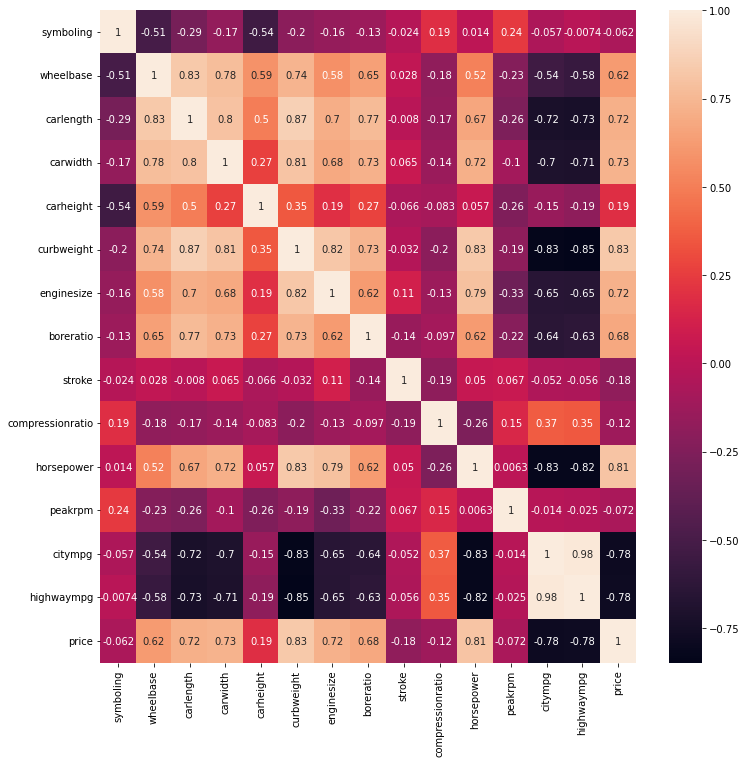

In [12]:
#correlation matrix
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data_bersih.corr(),annot=True)

# **3. Multiple Linear Regression**

**Asumsi Non Multikolinieritas**

Non multikolinieritas merupakan salah satu asumsi yang harus terpenuhi saat membentuk model regresi linier berganda. Checking asumsi ini dapat dilakukan sebelum pembuatan model regresi untuk mengatasi terjadi efek multikolinieritas antar variabel dalam model yang akan digunakan.
Multikolinieritas akan dicek menggunakan nilai VIF. Dikatakan memiliki multikolinieritas apabila VIF>10.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

multiko=data_bersih[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]

nilai=pd.DataFrame()

nilai['Variabel']=multiko.columns
nilai["VIF"] = [variance_inflation_factor(multiko.values, i) for i in range(multiko.shape[1])]
nilai.sort_values('VIF',ascending=False)

,Variabel,VIF
3,carwidth,4479.190699
1,wheelbase,2856.559598
2,carlength,2059.705387
13,highwaympg,1029.367654
4,carheight,927.566259
12,citympg,781.782421
7,boreratio,545.714225
9,compressionratio,484.255399
5,curbweight,446.335329
8,stroke,391.919557


Output tersebut menunjukkan bahwa hanya variabel symboling saja yang memiliki nilai VIF<10 sehingga masih terdapat efek multikolinieritas pada variabel-variabel yang digunakan. Pada pengolahan kali ini akan ditangani menggunakan Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)**

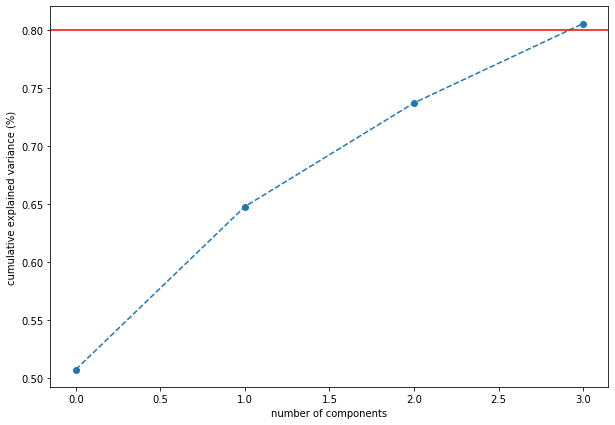

In [76]:
#PCA
from sklearn.preprocessing import StandardScaler

x_pca = StandardScaler().fit_transform(multiko)

from sklearn.decomposition import PCA
import numpy as np

batas=0.80
pca = PCA(n_components=batas).fit(x_pca)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linestyle='--',marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance (%)')
plt.axhline(y=batas, color='red', linestyle='-')

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.50727001, 0.64788357, 0.7373345 , 0.80582292])

Setelah dilakukan PCA, diperoleh bahwa sejumlah 4 komponen utama sudah mampu menjelaskan > 80% variance data-data di variabel asli sehingga akan digunakan 4 komponen utama. (0.0 pada gambar menunjukkan komponen ke-1 sehingga 3.0 menunjukkan komponen ke-4)

In [50]:
#hasil analisis PCA (4 Komponen Utama)

data_pca=PCA(n_components=4).fit_transform(x_pca)
data1_pca=pd.DataFrame(data=data_pca,columns=['PC1','PC2','PC3','PC4'])
data1_pca

,PC1,PC2,PC3,PC4
0,-0.177358,2.629664,-2.542604,2.577962
1,-0.177358,2.629664,-2.542604,2.577962
2,1.199235,1.629745,1.371897,0.646986
3,0.220522,0.660893,-0.915900,-1.424770
4,2.361559,1.585769,1.634581,-0.197889
...,...,...,...,...
134,5.179441,-0.846818,1.300160,0.073462
135,4.208977,-1.475692,-1.569420,-1.554389
136,5.364575,-0.791167,-0.474898,-0.913884
137,5.305929,-0.797012,-1.390424,-0.909003


In [51]:
nilai=pd.DataFrame()

nilai['Variabel']=data1_pca.columns
nilai["VIF"] = [variance_inflation_factor(data1_pca.values, i) for i in range(data1_pca.shape[1])]
nilai.sort_values('VIF',ascending=False)

,Variabel,VIF
0,PC1,1.0
1,PC2,1.0
2,PC3,1.0
3,PC4,1.0


**Dummy Variables**

Variabel dummy akan dibentuk untuk semua variabel yang memiliki tipe data kategorik.

In [32]:
variabel=data_bersih.drop(['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'],axis=1)


In [52]:
data_variabel0=variabel.reset_index().assign(PC1=data1_pca.PC1,PC2=data1_pca.PC2,PC3=data1_pca.PC3,PC4=data1_pca.PC4)
data_variabel=pd.get_dummies(data_variabel0)
data_variabel

,index,price,PC1,PC2,PC3,PC4,name_Nissan,name_alfa-romero,name_audi,name_bmw,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,13495.0,-0.177358,2.629664,-2.542604,2.577962,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,16500.0,-0.177358,2.629664,-2.542604,2.577962,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,16500.0,1.199235,1.629745,1.371897,0.646986,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,13950.0,0.220522,0.660893,-0.915900,-1.424770,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,4,17450.0,2.361559,1.585769,1.634581,-0.197889,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,199,18950.0,5.179441,-0.846818,1.300160,0.073462,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
135,200,16845.0,4.208977,-1.475692,-1.569420,-1.554389,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
136,201,19045.0,5.364575,-0.791167,-0.474898,-0.913884,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
137,202,21485.0,5.305929,-0.797012,-1.390424,-0.909003,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


**Model Regresi**

In [53]:
#membentuk variabel y dan x
import numpy as np

y=np.log(data_variabel.price) #ditransformasi ke Logaritma Natural
x=data_variabel.drop(['index','price'],axis=1)

In [54]:
#membentuk model regresi

import statsmodels.api as sm

model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     32.69
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.53e-41
Time:                        12:47:26   Log-Likelihood:                 117.47
No. Observations:                 139   AIC:                            -154.9
Df Residuals:                      99   BIC:                            -37.56
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PC1                      0.0944      0.014      6.903      0.000       0.067       0.122
PC2                      0.0448      0.023      1.984      0.050    -1.2e-05       0.090
PC3                     -0.0124      0.022     -0.566      0.573      -0.056       0.031
PC4                     -0.0396      0.025     -1.609      0.111      -0.088       0.009
name_Nissan              0.0206      0.045      0.454      0.651      -0.070       0.111
name_alfa-romero         0.2574      0.120      2.145      0.034       0.019       0.496
name_audi                0.2433      0.109      2.240      0.027       0.028       0.459
name_bmw                 0.4782      0.092      5.226      0.000       0.297       0.660
name_chevrolet           0.0474      0.090      0.524      0.601      -0.132       0.227
name_dodge              -0.0603      0.060     -1.005      0.317      -0.179       0.059
name_honda               0.1726      0.108      1.604      0.112      -0.041       0.386
name_isuzu               0.1935      0.080      2.429      0.017       0.035       0.352
name_mazda               0.0457      0.049      0.932      0.354      -0.052       0.143
name_mercury             0.0002      0.146      0.002      0.999      -0.290       0.290
name_mitsubishi         -0.1072      0.065     -1.649      0.102      -0.236       0.022
name_peugeot             0.2367      0.051      4.634      0.000       0.135       0.338
name_plymouth           -0.0694      0.063     -1.107      0.271      -0.194       0.055
name_porsche             0.4619      0.141      3.282      0.001       0.183       0.741
name_saab                0.1489      0.085      1.745      0.084      -0.020       0.318
name_toyota              0.0508      0.046      1.106      0.271      -0.040       0.142
name_volkswagen          0.0055      0.065      0.085      0.932      -0.123       0.134
name_volvo               0.0897      0.091      0.990      0.325      -0.090       0.270
fueltypes_gas            2.2156      0.018    120.739      0.000       2.179       2.252
aspiration_std           1.0358      0.033     31.045      0.000       0.970       1.102
aspiration_turbo         1.1799      0.037     31.786      0.000       1.106       1.254
doornumbers_four         1.1424      0.020     55.877      0.000       1.102       1.183
doornumbers_two          1.0732      0.020     53.983      0.000       1.034       1.113
carbody_convertible      0.7134      0.075      9.563      0.000       0.565       0.861
carbody_hardtop          0.3317      0.061      5.415      0.000       0.210       0.453
carbody_hatchback        0.4090      0.030     13.825      0.000       0.350       0.468
carbody_sedan            0.3955      0.032     12.351      0.000       0.332       0.459
carbody_wagon            0.3660      0.046      7.938    

**Asumsi Normalitas Residual**

In [ ]:
#uji asumsi normalitas residual

Asumsi normalitas residual telah terpenuhi karena nilai p-value Jarque-Bera(JB-Test) = 0.0101 > 0.01 (taraf signifikansi yang digunakan 1%)

**Asumsi Linieritas**

In [55]:
#uji asumsi linieritas
import statsmodels.stats.diagnostic as dg

dg.linear_reset(model)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[0.41903112]], p-value=0.8109770196200197, df_denom=2>

Berdasarkan hasil Ramsey Reset Test diperoleh hasil bahwa nilai p-value = 0.8109770196200197 > 0.01 (taraf signifikansi yang digunakan 1%) maka dapat disimpulkan bahwa asumsi linieritas telah terpenuhi.

**Asumsi Non Heteroskedastisitas**

In [61]:
#uji asumsi non heteroskedastisitas
resid=model.resid

import statsmodels.stats as stats
white_test=stats.diagnostic.het_white(resid, model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 134.10898225597208, 'Test Statistic p-value': 0.4324637522306728, 'F-Statistic': 1.2463383182897154, 'F-Test p-value': 0.43022143798994433}


Diperoleh nilai Test Statistic p-value = 0.4324637522306728 > 0.01 (taraf signifikansi yang digunakan 1%) maka dapat disimpulkan bahwa asumsi non heteroskedastisitas telah terpenuhi.

**Asumsi Non Autokorelasi**

In [62]:
#uji asumsi non autokorelasi

from statsmodels.sandbox.stats.runs import runstest_1samp 

runstest_1samp(resid, correction=False)

(-1.4423389870594214, 0.14920676679134667)

Diperoleh nilai p-value uji Runs (Runs Test) = 0.14920676679134667 > 0.01 (taraf signifikansi yang digunakan 1%) maka dapat disimpulkan bahwa asumsi non autokorelasi telah terpenuhi.

**Uji Simultan**

Berdasarkan hasil model regresi diperoleh bahwa nilai p-value (F-Statistics) = 1.53e-41 < 0.01 (taraf signifikansi yang digunakan 1%) maka dapat disimpulkan bahwa model regresi cocok atau variabel independent secara bersama-sama mempengaruhi variabel dependent.

**Uji Parsial**

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     32.69
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.53e-41
Time:                        13:22:23   Log-Likelihood:                 117.47
No. Observations:                 139   AIC:                            -154.9
Df Residuals:                      99   BIC:                            -37.56
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PC1                      0.0944      0.014      6.903      0.000       0.067       0.122
PC2                      0.0448      0.023      1.984      0.050    -1.2e-05       0.090
PC3                     -0.0124      0.022     -0.566      0.573      -0.056       0.031
PC4                     -0.0396      0.025     -1.609      0.111      -0.088       0.009
name_Nissan              0.0206      0.045      0.454      0.651      -0.070       0.111
name_alfa-romero         0.2574      0.120      2.145      0.034       0.019       0.496
name_audi                0.2433      0.109      2.240      0.027       0.028       0.459
name_bmw                 0.4782      0.092      5.226      0.000       0.297       0.660
name_chevrolet           0.0474      0.090      0.524      0.601      -0.132       0.227
name_dodge              -0.0603      0.060     -1.005      0.317      -0.179       0.059
name_honda               0.1726      0.108      1.604      0.112      -0.041       0.386
name_isuzu               0.1935      0.080      2.429      0.017       0.035       0.352
name_mazda               0.0457      0.049      0.932      0.354      -0.052       0.143
name_mercury             0.0002      0.146      0.002      0.999      -0.290       0.290
name_mitsubishi         -0.1072      0.065     -1.649      0.102      -0.236       0.022
name_peugeot             0.2367      0.051      4.634      0.000       0.135       0.338
name_plymouth           -0.0694      0.063     -1.107      0.271      -0.194       0.055
name_porsche             0.4619      0.141      3.282      0.001       0.183       0.741
name_saab                0.1489      0.085      1.745      0.084      -0.020       0.318
name_toyota              0.0508      0.046      1.106      0.271      -0.040       0.142
name_volkswagen          0.0055      0.065      0.085      0.932      -0.123       0.134
name_volvo               0.0897      0.091      0.990      0.325      -0.090       0.270
fueltypes_gas            2.2156      0.018    120.739      0.000       2.179       2.252
aspiration_std           1.0358      0.033     31.045      0.000       0.970       1.102
aspiration_turbo         1.1799      0.037     31.786      0.000       1.106       1.254
doornumbers_four         1.1424      0.020     55.877      0.000       1.102       1.183
doornumbers_two          1.0732      0.020     53.983      0.000       1.034       1.113
carbody_convertible      0.7134      0.075      9.563      0.000       0.565       0.861
carbody_hardtop          0.3317      0.061      5.415      0.000       0.210       0.453
carbody_hatchback        0.4090      0.030     13.825      0.000       0.350       0.468
carbody_sedan            0.3955      0.032     12.351      0.000       0.332       0.459
carbody_wagon            0.3660      0.046      7.938    

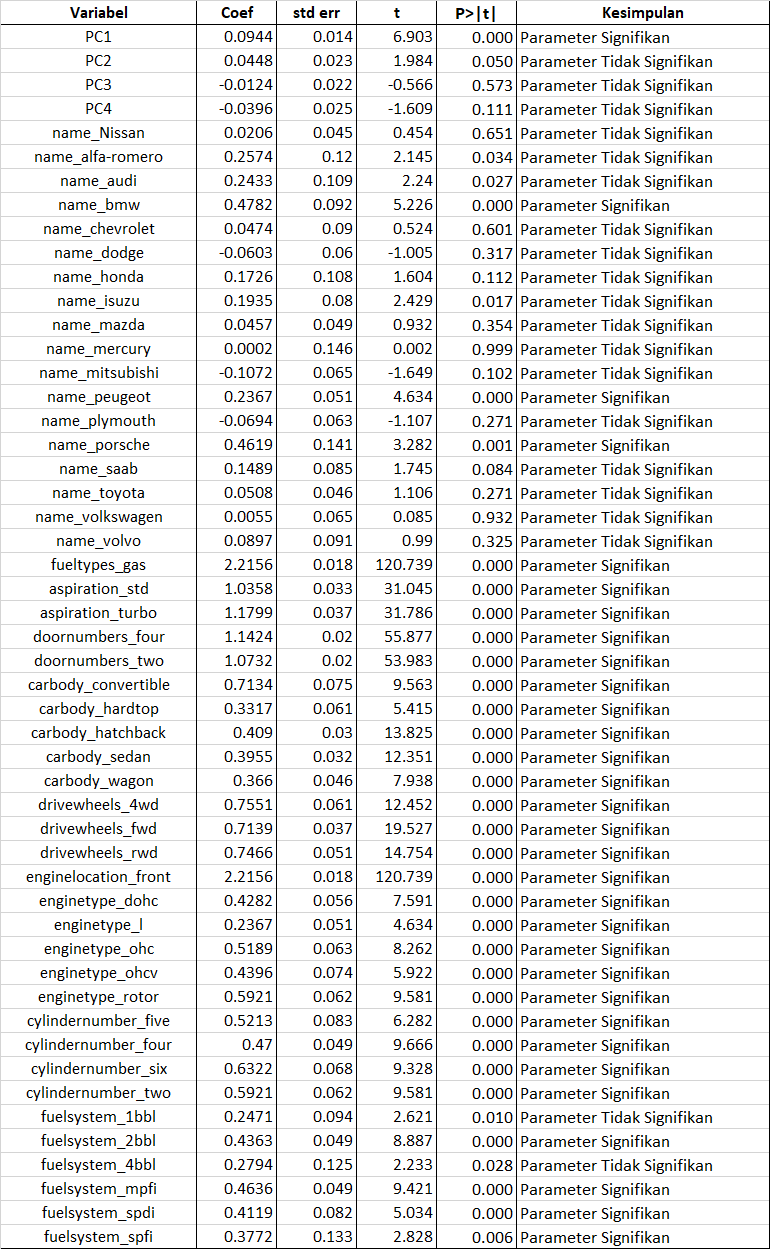

**Koefisien Determinasi**

Nilai R-squared =	0.928 mengartikan bahwa variabel independent mampu menjelaskan 92.8% variasi dari variabel dependent.

**Mean Absolut Percentage (MAPE)**

Nilai MAPE digunakan untuk mengetahui seberapa cocok model untuk digunakan dalam prediksi. Nilai MAPE < 20% menandakan bahwa model baik untuk digunakan dalam prediksi atau model layak.

In [103]:
mape=np.mean(abs(resid/y_pred))*100
print('Nilai MAPE model =',mape,'%')

Nilai MAPE model = 0.8570534553167806 %


Diperoleh nilai MAPE = 0.8570534553167806% < 20% yang menandakan bahwa model cocok digunakan untuk prediksi car price.

**Plot Aktual vs Prediksi**

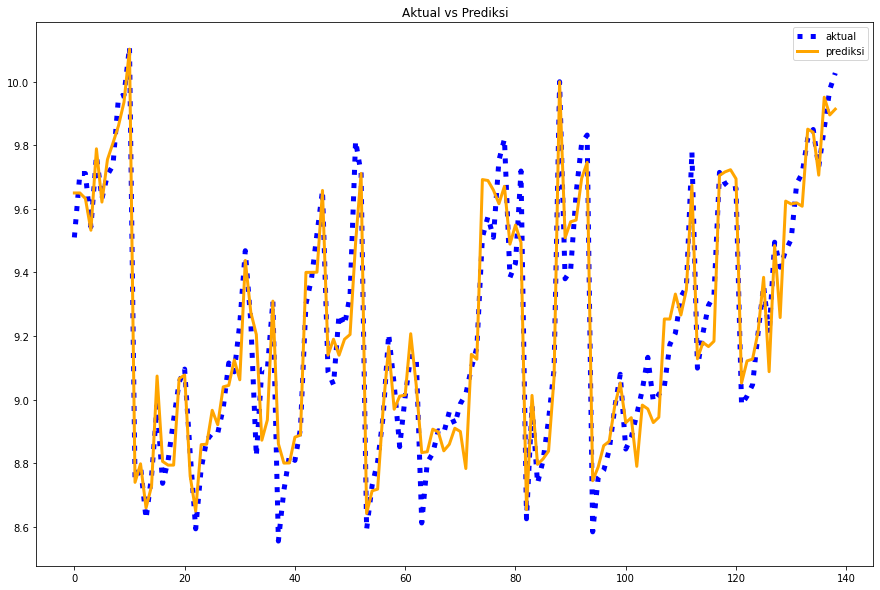

In [95]:
y_pred=model.predict()

plt.figure(figsize=(15,10))
plt.plot(y,linestyle='dotted',color='blue',linewidth=5,label='aktual')
plt.plot(y_pred,linestyle='-',color='orange',linewidth=3,label='prediksi')
plt.title('Aktual vs Prediksi')
plt.legend()
plt.show()

# **4. Kesimpulan**

Beradasarkan hasil analisis dapat disimpulkan bahwa:


*   Model yang terbentuk memiliki nilai R-Square (Koefisien Determinasi) =  0.928 mengartikan bahwa variabel independent mampu menjelaskan 92.8% variasi dari variabel dependent.
*   Nilai MAPE = 0.8570534553167806% < 20% yang menandakan bahwa model cocok digunakan untuk prediksi car price.
*   Besar pengaruh masing-masing variabel adalah:


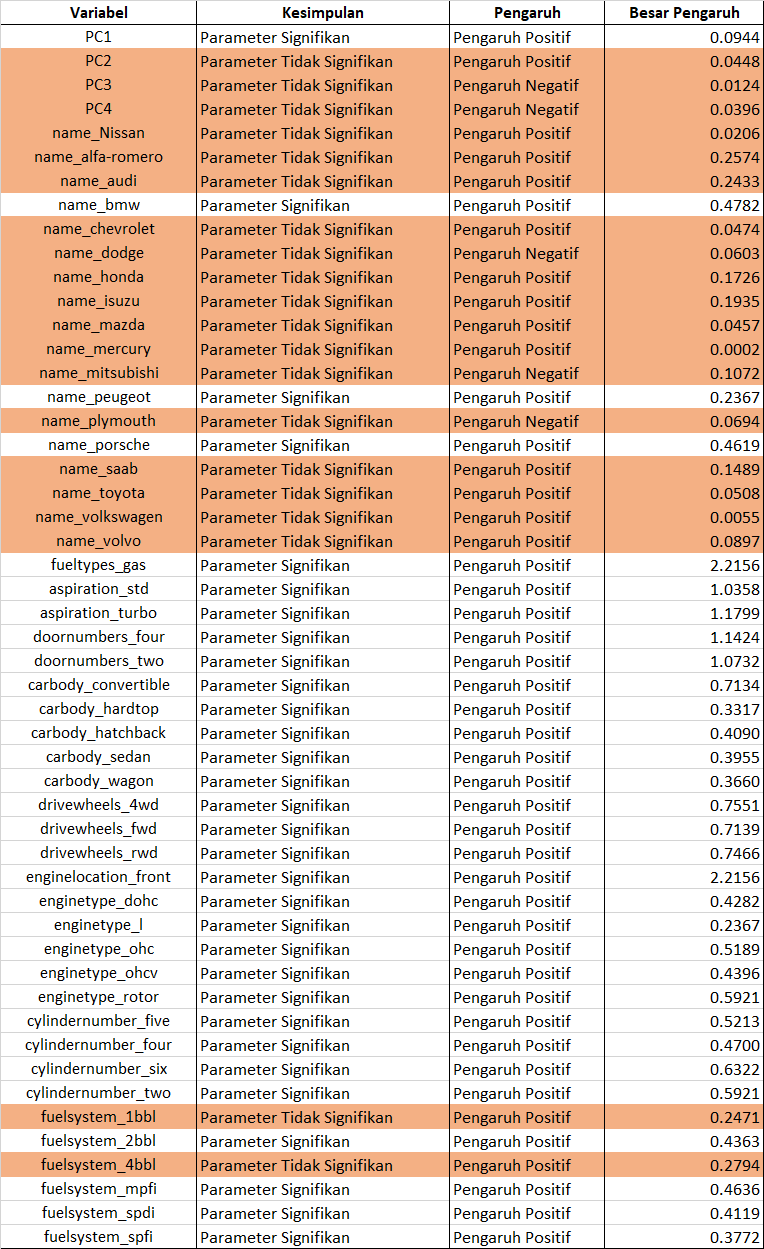